In [1]:
import numpy as np
import pandas as pd
import csv
import requests
from bs4 import BeautifulSoup
import re
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
title = []
rating = []
discount_price = []
original_price = []
discount_percent = []
features = []
reviews = []
delivery = []

for i in range(1,21):
    url = 'https://www.flipkart.com/search?q=television&sid=ckf%2Cczl&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_2_4_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_2_4_na_na_na&as-pos=2&as-type=RECENT&suggestionId=television%7CTelevisions&requestId=75d5bd80-2308-44c6-84d4-d1e4c9adc372&as-backfill=on&page={}'. format(i)
    
    page = requests.get(url)
    htmlCode = page.text
    
    soup = BeautifulSoup(htmlCode)
    
    for x in soup.find_all('div', attrs={'class' : '_2kHMtA'}): 

        product = x.find('div', attrs={'class' : '_4rR01T'})
        if product is None:
            title.append(np.NaN)
        else:
            title.append(product.text)

        original_mrp = x.find('div', attrs={'class' : '_3I9_wc _27UcVY'})
        if original_mrp is None:
            original_price.append(np.NaN)
        else:
            original_price.append(original_mrp.text)
            
        discount_mrp = x.find('div', attrs={'class' : '_30jeq3 _1_WHN1'})
        if discount_mrp is None:
            discount_price.append(np.NaN)
        else:
            discount_price.append(discount_mrp.text)    

        discount = x.find('div', attrs={'class' : '_3Ay6Sb'})
        if discount is None:
            discount_percent.append(np.NaN)
        else:
            discount_percent.append(discount.text)  
        
        rate = x.find('div', attrs={'class' : '_3LWZlK'})
        if rate is None:
            rating.append(np.NaN)
        else:
            rating.append(rate.text)
            
        f = x.find('ul', attrs={'class' : '_1xgFaf'})
        if f is None:
            features.append(np.NaN)
        else:
            features.append(f.text)

        review = x.find('span', attrs={'class' : '_2_R_DZ'})
        if review is None:
            reviews.append(np.NaN)
        else:
            reviews.append(review.text)
            
        free = x.find('div', attrs={'class' : '_3tcB5a p8ucoS'})
        if free is None:
            delivery.append(np.NaN)
        else:
            delivery.append(free.text)    

In [3]:
print(len(title))
print(len(discount_price))
print(len(original_price))
print(len(discount_percent))
print(len(rating))
print(len(features))
print(len(reviews))
print(len(delivery))

480
480
480
480
480
480
480
480


In [4]:
df = pd.DataFrame({'Product' : title,
                   'Features' : features,
                   'Total no. of Ratings & Reviews' : reviews,
                   'Rating' : rating,
                   'Original_Price' : original_price,
                   'Discount_Price' : discount_price,
                   'Discount' : discount_percent,
                   'Delivery' : delivery})


In [5]:
df

,Product,Features,Total no. of Ratings & Reviews,Rating,Original_Price,Discount_Price,Discount,Delivery
0,Adsun 80 cm (32 inch) HD Ready LED Smart Andro...,Operating System: Android BasedHD Ready 1366 x...,"19,724 Ratings & 2,941 Reviews",3.9,"₹21,999","₹7,950",63% off,Free delivery
1,Mi A series 80 cm (32 inch) HD Ready LED Smart...,Operating System: Google TVHD Ready 1366 x 768...,"4,44,167 Ratings & 45,890 Reviews",4.4,"₹24,999","₹14,999",40% off,Free delivery
2,LG 80 cm (32 inch) HD Ready LED Smart WebOS TV,Operating System: WebOSHD Ready 1366 x 768 Pix...,"59,540 Ratings & 5,148 Reviews",4.4,"₹21,990","₹13,490",38% off,Free delivery by Today
3,iFFALCON by TCL 80.04 cm (32 inch) HD Ready LE...,Operating System: AndroidHD Ready 1366 x 768 P...,"14,441 Ratings & 2,054 Reviews",4.2,"₹19,990","₹10,999",44% off,Free delivery by Today
4,Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...,Operating System: AndroidHD Ready 1366 x 768 P...,"84,983 Ratings & 7,220 Reviews",4.3,"₹24,999","₹13,999",44% off,Free delivery by Today
...,...,...,...,...,...,...,...,...
475,SONY Bravia 163.9 cm (65 inch) Ultra HD (4K) L...,Operating System: Google TVUltra HD (4K) 3840 ...,347 Ratings & 78 Reviews,4.7,"₹1,79,900","₹94,990",47% off,Free delivery
476,Compaq HUEQ W32N 80 cm (32 inch) HD Ready LED ...,HD Ready 1366 x 768 Pixels1 Year Warranty on P...,"2,775 Ratings & 463 Reviews",4.2,"₹17,999","₹7,999",55% off,Free delivery
477,Adsun Frameless 60 cm (24 inch) HD Ready LED TV,HD Ready 1366 x 768 Pixels3 Years Standard Man...,"19,724 Ratings & 2,941 Reviews",3.9,"₹14,999","₹5,990",60% off,Free delivery
478,SAMSUNG The Serif Series 138 cm (55 inch) QLED...,Operating System: TizenUltra HD (4K) 3840 x 21...,75 Ratings & 7 Reviews,4.3,"₹1,63,900","₹88,990",45% off,Free delivery


In [6]:
df.to_csv('flipkart_tv_480.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Product                         480 non-null    object
 1   Features                        480 non-null    object
 2   Total no. of Ratings & Reviews  424 non-null    object
 3   Rating                          424 non-null    object
 4   Original_Price                  470 non-null    object
 5   Discount_Price                  480 non-null    object
 6   Discount                        467 non-null    object
 7   Delivery                        472 non-null    object
dtypes: object(8)
memory usage: 30.1+ KB


In [8]:
df.isnull().sum()

Product                            0
Features                           0
Total no. of Ratings & Reviews    56
Rating                            56
Original_Price                    10
Discount_Price                     0
Discount                          13
Delivery                           8
dtype: int64

In [9]:
df.Discount_Price = df.Discount_Price.apply(lambda x : x.replace('₹', '').replace(',', '')).astype(float)

In [10]:
df

,Product,Features,Total no. of Ratings & Reviews,Rating,Original_Price,Discount_Price,Discount,Delivery
0,Adsun 80 cm (32 inch) HD Ready LED Smart Andro...,Operating System: Android BasedHD Ready 1366 x...,"19,724 Ratings & 2,941 Reviews",3.9,"₹21,999",7950.0,63% off,Free delivery
1,Mi A series 80 cm (32 inch) HD Ready LED Smart...,Operating System: Google TVHD Ready 1366 x 768...,"4,44,167 Ratings & 45,890 Reviews",4.4,"₹24,999",14999.0,40% off,Free delivery
2,LG 80 cm (32 inch) HD Ready LED Smart WebOS TV,Operating System: WebOSHD Ready 1366 x 768 Pix...,"59,540 Ratings & 5,148 Reviews",4.4,"₹21,990",13490.0,38% off,Free delivery by Today
3,iFFALCON by TCL 80.04 cm (32 inch) HD Ready LE...,Operating System: AndroidHD Ready 1366 x 768 P...,"14,441 Ratings & 2,054 Reviews",4.2,"₹19,990",10999.0,44% off,Free delivery by Today
4,Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...,Operating System: AndroidHD Ready 1366 x 768 P...,"84,983 Ratings & 7,220 Reviews",4.3,"₹24,999",13999.0,44% off,Free delivery by Today
...,...,...,...,...,...,...,...,...
475,SONY Bravia 163.9 cm (65 inch) Ultra HD (4K) L...,Operating System: Google TVUltra HD (4K) 3840 ...,347 Ratings & 78 Reviews,4.7,"₹1,79,900",94990.0,47% off,Free delivery
476,Compaq HUEQ W32N 80 cm (32 inch) HD Ready LED ...,HD Ready 1366 x 768 Pixels1 Year Warranty on P...,"2,775 Ratings & 463 Reviews",4.2,"₹17,999",7999.0,55% off,Free delivery
477,Adsun Frameless 60 cm (24 inch) HD Ready LED TV,HD Ready 1366 x 768 Pixels3 Years Standard Man...,"19,724 Ratings & 2,941 Reviews",3.9,"₹14,999",5990.0,60% off,Free delivery
478,SAMSUNG The Serif Series 138 cm (55 inch) QLED...,Operating System: TizenUltra HD (4K) 3840 x 21...,75 Ratings & 7 Reviews,4.3,"₹1,63,900",88990.0,45% off,Free delivery


In [11]:
df2 = df.dropna()

In [12]:
df2

,Product,Features,Total no. of Ratings & Reviews,Rating,Original_Price,Discount_Price,Discount,Delivery
0,Adsun 80 cm (32 inch) HD Ready LED Smart Andro...,Operating System: Android BasedHD Ready 1366 x...,"19,724 Ratings & 2,941 Reviews",3.9,"₹21,999",7950.0,63% off,Free delivery
1,Mi A series 80 cm (32 inch) HD Ready LED Smart...,Operating System: Google TVHD Ready 1366 x 768...,"4,44,167 Ratings & 45,890 Reviews",4.4,"₹24,999",14999.0,40% off,Free delivery
2,LG 80 cm (32 inch) HD Ready LED Smart WebOS TV,Operating System: WebOSHD Ready 1366 x 768 Pix...,"59,540 Ratings & 5,148 Reviews",4.4,"₹21,990",13490.0,38% off,Free delivery by Today
3,iFFALCON by TCL 80.04 cm (32 inch) HD Ready LE...,Operating System: AndroidHD Ready 1366 x 768 P...,"14,441 Ratings & 2,054 Reviews",4.2,"₹19,990",10999.0,44% off,Free delivery by Today
4,Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...,Operating System: AndroidHD Ready 1366 x 768 P...,"84,983 Ratings & 7,220 Reviews",4.3,"₹24,999",13999.0,44% off,Free delivery by Today
...,...,...,...,...,...,...,...,...
474,SKYTRON 108 cm (43 inch) Ultra HD (4K) LED Sma...,Operating System: Android BasedUltra HD (4K) 3...,36 Ratings & 7 Reviews,3.9,"₹39,999",17999.0,55% off,Free delivery
475,SONY Bravia 163.9 cm (65 inch) Ultra HD (4K) L...,Operating System: Google TVUltra HD (4K) 3840 ...,347 Ratings & 78 Reviews,4.7,"₹1,79,900",94990.0,47% off,Free delivery
476,Compaq HUEQ W32N 80 cm (32 inch) HD Ready LED ...,HD Ready 1366 x 768 Pixels1 Year Warranty on P...,"2,775 Ratings & 463 Reviews",4.2,"₹17,999",7999.0,55% off,Free delivery
477,Adsun Frameless 60 cm (24 inch) HD Ready LED TV,HD Ready 1366 x 768 Pixels3 Years Standard Man...,"19,724 Ratings & 2,941 Reviews",3.9,"₹14,999",5990.0,60% off,Free delivery


In [13]:
df2.isnull().sum()

Product                           0
Features                          0
Total no. of Ratings & Reviews    0
Rating                            0
Original_Price                    0
Discount_Price                    0
Discount                          0
Delivery                          0
dtype: int64

In [14]:
df['Total no. of Ratings & Reviews']

0         19,724 Ratings & 2,941 Reviews
1      4,44,167 Ratings & 45,890 Reviews
2         59,540 Ratings & 5,148 Reviews
3         14,441 Ratings & 2,054 Reviews
4         84,983 Ratings & 7,220 Reviews
                     ...                
475             347 Ratings & 78 Reviews
476          2,775 Ratings & 463 Reviews
477       19,724 Ratings & 2,941 Reviews
478               75 Ratings & 7 Reviews
479                                  NaN
Name: Total no. of Ratings & Reviews, Length: 480, dtype: object

In [15]:
df['Discount']

0      63% off
1      40% off
2      38% off
3      44% off
4      44% off
        ...   
475    47% off
476    55% off
477    60% off
478    45% off
479    46% off
Name: Discount, Length: 480, dtype: object

In [16]:
df.head()

,Product,Features,Total no. of Ratings & Reviews,Rating,Original_Price,Discount_Price,Discount,Delivery
0,Adsun 80 cm (32 inch) HD Ready LED Smart Andro...,Operating System: Android BasedHD Ready 1366 x...,"19,724 Ratings & 2,941 Reviews",3.9,"₹21,999",7950.0,63% off,Free delivery
1,Mi A series 80 cm (32 inch) HD Ready LED Smart...,Operating System: Google TVHD Ready 1366 x 768...,"4,44,167 Ratings & 45,890 Reviews",4.4,"₹24,999",14999.0,40% off,Free delivery
2,LG 80 cm (32 inch) HD Ready LED Smart WebOS TV,Operating System: WebOSHD Ready 1366 x 768 Pix...,"59,540 Ratings & 5,148 Reviews",4.4,"₹21,990",13490.0,38% off,Free delivery by Today
3,iFFALCON by TCL 80.04 cm (32 inch) HD Ready LE...,Operating System: AndroidHD Ready 1366 x 768 P...,"14,441 Ratings & 2,054 Reviews",4.2,"₹19,990",10999.0,44% off,Free delivery by Today
4,Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...,Operating System: AndroidHD Ready 1366 x 768 P...,"84,983 Ratings & 7,220 Reviews",4.3,"₹24,999",13999.0,44% off,Free delivery by Today


In [17]:
df.tail()

,Product,Features,Total no. of Ratings & Reviews,Rating,Original_Price,Discount_Price,Discount,Delivery
475,SONY Bravia 163.9 cm (65 inch) Ultra HD (4K) L...,Operating System: Google TVUltra HD (4K) 3840 ...,347 Ratings & 78 Reviews,4.7,"₹1,79,900",94990.0,47% off,Free delivery
476,Compaq HUEQ W32N 80 cm (32 inch) HD Ready LED ...,HD Ready 1366 x 768 Pixels1 Year Warranty on P...,"2,775 Ratings & 463 Reviews",4.2,"₹17,999",7999.0,55% off,Free delivery
477,Adsun Frameless 60 cm (24 inch) HD Ready LED TV,HD Ready 1366 x 768 Pixels3 Years Standard Man...,"19,724 Ratings & 2,941 Reviews",3.9,"₹14,999",5990.0,60% off,Free delivery
478,SAMSUNG The Serif Series 138 cm (55 inch) QLED...,Operating System: TizenUltra HD (4K) 3840 x 21...,75 Ratings & 7 Reviews,4.3,"₹1,63,900",88990.0,45% off,Free delivery
479,SONY 215 cm (85 inch) Ultra HD (4K) LED Smart ...,Operating System: AndroidUltra HD (4K) 3840 x ...,NaN,NaN,"₹5,99,990",319990.0,46% off,Free delivery


In [18]:
df.loc[235]

Product                           SENS Pikaso 127 cm (50 inch) Ultra HD (4K) LED...
Features                          Operating System: AndroidUltra HD (4K) 3840 x ...
Total no. of Ratings & Reviews                          2,233 Ratings & 363 Reviews
Rating                                                                          4.2
Original_Price                                                              ₹48,690
Discount_Price                                                              24999.0
Discount                                                                    48% off
Delivery                                                     Free delivery by Today
Name: 235, dtype: object

In [19]:
df.describe()

,Discount_Price
count,480.000000
mean,32338.347917
std,42477.451130
min,5649.000000
25%,9724.000000
50%,19999.000000
75%,34999.000000
max,348999.000000


In [20]:
df.value_counts('Delivery')

Delivery
Free delivery             346
Free delivery by Today    126
dtype: int64

In [21]:
df.value_counts('Rating')

Rating
4.2    141
4.3     65
3.9     64
4.4     64
4.1     21
4.5     16
4.7     13
4.6     11
4        9
4.8      6
5        4
3        3
3.7      2
3.8      2
4.9      2
3.6      1
dtype: int64

In [22]:
x = df.groupby('Features')
print(x.count())

                                                    Product  \
Features                                                      
Full HD 1,366 x 768 Pixels1 Year Warranty Remi ...        1   
Full HD 1366 x 768 Pixels1 Year remi Comprehens...        1   
Full HD 1920 x 1080 Pixels1 Year Warranty on Pr...        1   
Full HD 1920 x 1080 PixelsOne year comprehensiv...        1   
HD Ready 1366 x 768 Pixels1 Year Comprehensive ...        1   
...                                                     ...   
Operating System: WebOSUltra HD (4K) 3840 x 216...        1   
Ultra HD (4K) 3840 x 2160 Pixels1 Year Warranty           1   
Ultra HD (4K) 3840 x 2160 Pixels1 Year Warranty...        2   
Ultra HD (4K) 3840 x 2160 Pixels1 Year on Product         1   
Ultra HD (4K) 3840 x 2160 Pixels1 year comprehe...        2   

                                                    Total no. of Ratings & Reviews  \
Features                                                                             
Full HD 

In [23]:
df.groupby('Rating').count()

,Product,Features,Total no. of Ratings & Reviews,Original_Price,Discount_Price,Discount,Delivery
Rating,,,,,,,
3,3,3,3,3,3,3,3
3.6,1,1,1,1,1,1,1
3.7,2,2,2,2,2,2,2
3.8,2,2,2,2,2,2,2
3.9,64,64,64,64,64,63,64
4,9,9,9,9,9,9,9
4.1,21,21,21,21,21,21,20
4.2,141,141,141,139,141,139,139
4.3,65,65,65,62,65,62,63


In [24]:
df[['Discount_Price','Discount']].groupby(['Discount_Price']).count()

,Discount
Discount_Price,
5649.0,1
5650.0,19
5846.0,1
5990.0,2
5999.0,20
...,...
249990.0,1
275490.0,1
293900.0,0


In [25]:
df[['Discount','Discount_Price']].groupby(['Discount']).count()

,Discount_Price
Discount,
1% off,2
13% off,1
15% off,1
16% off,2
17% off,2
18% off,1
19% off,3
20% off,1
21% off,3


In [26]:
df[['Rating','Original_Price']].groupby(['Rating','Original_Price']).count()

Empty DataFrame
Columns: []
Index: [(3, ₹26,900), (3, ₹71,990), (3.6, ₹1,64,900), (3.7, ₹24,490), (3.7, ₹39,900), (3.8, ₹54,999), (3.8, ₹70,900), (3.9, ₹12,999), (3.9, ₹14,999), (3.9, ₹16,999), (3.9, ₹2,41,900), (3.9, ₹21,999), (3.9, ₹23,999), (3.9, ₹29,999), (3.9, ₹39,999), (4, ₹1,05,990), (4, ₹18,500), (4, ₹19,000), (4, ₹21,000), (4, ₹23,900), (4, ₹23,990), (4, ₹30,000), (4, ₹60,990), (4, ₹69,990), (4.1, ₹1,66,990), (4.1, ₹1,99,990), (4.1, ₹10,499), (4.1, ₹10,999), (4.1, ₹12,499), (4.1, ₹15,000), (4.1, ₹15,999), (4.1, ₹18,999), (4.1, ₹19,000), (4.1, ₹23,990), (4.1, ₹30,000), (4.1, ₹37,290), (4.1, ₹37,999), (4.1, ₹70,990), (4.1, ₹89,900), (4.2, ₹1,20,990), (4.2, ₹1,24,900), (4.2, ₹1,44,900), (4.2, ₹10,999), (4.2, ₹16,999), (4.2, ₹17,999), (4.2, ₹18,999), (4.2, ₹19,990), (4.2, ₹19,999), (4.2, ₹2,54,990), (4.2, ₹20,000), (4.2, ₹20,990), (4.2, ₹21,999), (4.2, ₹24,900), (4.2, ₹24,990), (4.2, ₹24,999), (4.2, ₹25,990), (4.2, ₹26,990), (4.2, ₹32,990), (4.2, ₹32,999), (4.2, ₹34,990), (4.2, ₹35,000), (4.2, ₹35,999), (4.2, ₹36,990), (4.2, ₹43,999), (4.2, ₹48,690), (4.2, ₹48,990), (4.2, ₹48,999), (4.2, ₹49,990), (4.2, ₹50,490), (4.2, ₹52,990), (4.2, ₹54,990), (4.2, ₹56,790), (4.2, ₹59,990), (4.2, ₹60,990), (4.2, ₹66,990), (4.2, ₹70,290), (4.2, ₹79,990), (4.3, ₹1,06,990), (4.3, ₹1,14,990), (4.3, ₹1,63,900), (4.3, ₹16,400), (4.3, ₹17,999), (4.3, ₹19,990), (4.3, ₹20,999), (4.3, ₹21,490), (4.3, ₹21,999), (4.3, ₹23,490), (4.3, ₹24,999), (4.3, ₹27,990), (4.3, ₹28,240), (4.3, ₹29,642), (4.3, ₹29,999), (4.3, ₹30,490), (4.3, ₹31,999), (4.3, ₹33,000), (4.3, ₹34,990), (4.3, ₹34,999), (4.3, ₹35,999), (4.3, ₹39,999), (4.3, ₹40,000), ...]

[204 rows x 0 columns]

In [27]:
df

,Product,Features,Total no. of Ratings & Reviews,Rating,Original_Price,Discount_Price,Discount,Delivery
0,Adsun 80 cm (32 inch) HD Ready LED Smart Andro...,Operating System: Android BasedHD Ready 1366 x...,"19,724 Ratings & 2,941 Reviews",3.9,"₹21,999",7950.0,63% off,Free delivery
1,Mi A series 80 cm (32 inch) HD Ready LED Smart...,Operating System: Google TVHD Ready 1366 x 768...,"4,44,167 Ratings & 45,890 Reviews",4.4,"₹24,999",14999.0,40% off,Free delivery
2,LG 80 cm (32 inch) HD Ready LED Smart WebOS TV,Operating System: WebOSHD Ready 1366 x 768 Pix...,"59,540 Ratings & 5,148 Reviews",4.4,"₹21,990",13490.0,38% off,Free delivery by Today
3,iFFALCON by TCL 80.04 cm (32 inch) HD Ready LE...,Operating System: AndroidHD Ready 1366 x 768 P...,"14,441 Ratings & 2,054 Reviews",4.2,"₹19,990",10999.0,44% off,Free delivery by Today
4,Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...,Operating System: AndroidHD Ready 1366 x 768 P...,"84,983 Ratings & 7,220 Reviews",4.3,"₹24,999",13999.0,44% off,Free delivery by Today
...,...,...,...,...,...,...,...,...
475,SONY Bravia 163.9 cm (65 inch) Ultra HD (4K) L...,Operating System: Google TVUltra HD (4K) 3840 ...,347 Ratings & 78 Reviews,4.7,"₹1,79,900",94990.0,47% off,Free delivery
476,Compaq HUEQ W32N 80 cm (32 inch) HD Ready LED ...,HD Ready 1366 x 768 Pixels1 Year Warranty on P...,"2,775 Ratings & 463 Reviews",4.2,"₹17,999",7999.0,55% off,Free delivery
477,Adsun Frameless 60 cm (24 inch) HD Ready LED TV,HD Ready 1366 x 768 Pixels3 Years Standard Man...,"19,724 Ratings & 2,941 Reviews",3.9,"₹14,999",5990.0,60% off,Free delivery
478,SAMSUNG The Serif Series 138 cm (55 inch) QLED...,Operating System: TizenUltra HD (4K) 3840 x 21...,75 Ratings & 7 Reviews,4.3,"₹1,63,900",88990.0,45% off,Free delivery


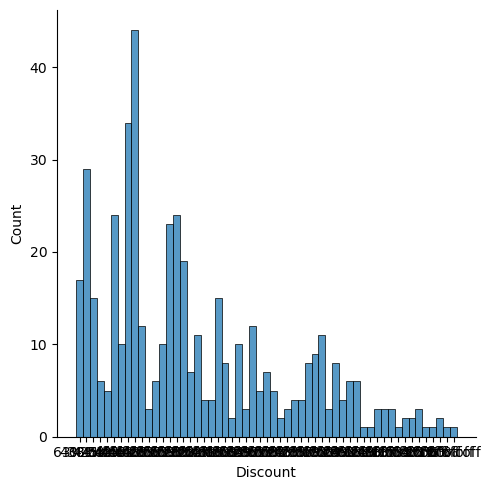

In [28]:
g = sns.displot(df.Discount , kind='hist', figsize)
g.set_xticklabels()

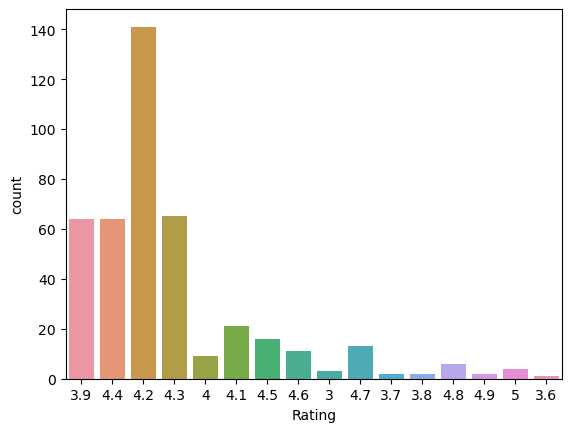

In [29]:
sns.countplot(x=df.Rating)
plt.show()

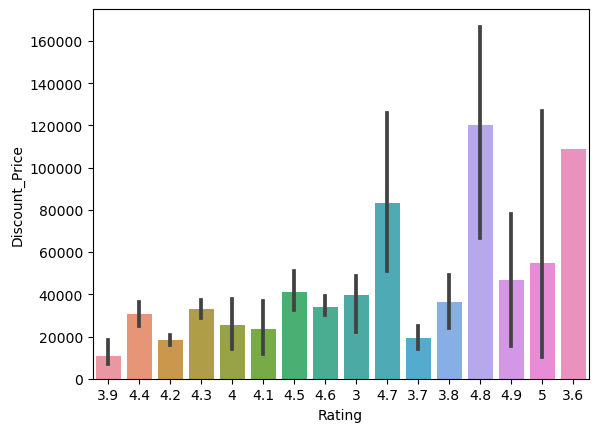

In [30]:
sns.barplot(x='Rating',y='Discount_Price',data=df)
plt.show()

In [31]:
df.groupby(['Product']).agg({'Discount_Price' : ['min', 'max', 'mean']})

Discount_Price           \
                                                              min      max   
Product                                                                      
AYKON 81 cm (32 inch) Full HD LED Smart Android...        11040.0  11040.0   
Acer Advanced I Series 101.6 cm (40 inch) Full ...        18499.0  18499.0   
Acer Advanced I Series 139 cm (55 inch) Ultra H...        34999.0  34999.0   
Acer Advanced I Series 80 cm (32 inch) HD Ready...        12999.0  12999.0   
Acer I Series 127 cm (50 inch) Ultra HD (4K) LE...        26999.0  26999.0   
...                                                           ...      ...   
realme 100.3 cm (40 inch) Full HD LED Smart And...        18999.0  18999.0   
realme 108 cm (43 inch) Full HD LED Smart Andro...        20999.0  20999.0   
realme 80 cm (32 inch) HD Ready LED Smart Andro...        11999.0  11999.0   
realme 80 cm (32 inch) HD Ready LED Smart Andro...        12999.0  12999.0   
realme NEO 80 cm (32 inch) HD Ready LED Smart L...        11999.0  11999.0   

                                                             
                                                       mean  
Product                                                      
AYKON 81 cm (32 inch) Full HD LED Smart Android...  11040.0  
Acer Advanced I Series 101.6 cm (40 inch) Full ...  18499.0  
Acer Advanced I Series 139 cm (55 inch) Ultra H...  34999.0  
Acer Advanced I Series 80 cm (32 inch) HD Ready...  12999.0  
Acer I Series 127 cm (50 inch) Ultra HD (4K) LE...  26999.0  
...                                                     ...  
realme 100.3 cm (40 inch) Full HD LED Smart And...  18999.0  
realme 108 cm (43 inch) Full HD LED Smart Andro...  20999.0  
realme 80 cm (32 inch) HD Ready LED Smart Andro...  11999.0  
realme 80 cm (32 inch) HD Ready LED Smart Andro...  12999.0  
realme NEO 80 cm (32 inch) HD Ready LED Smart L...  11999.0  

[263 rows x 3 columns]

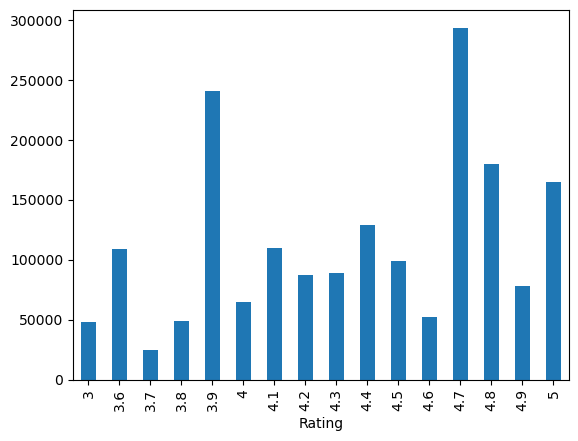

In [32]:
df.groupby(['Rating'])['Discount_Price'].max().plot(kind = 'bar')
plt.show()

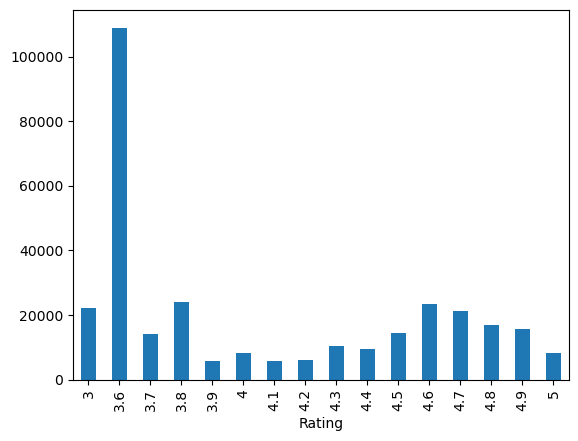

In [33]:
df.groupby(['Rating'])['Discount_Price'].min().plot(kind = 'bar')
plt.show()